### This Sheet will cover
Load & clean data

EDA (stats, distributions, pairplots, heatmap)

Clustering (KMeans + optionally Hierarchical or DBSCAN)

Optimal cluster number determination (Elbow + Silhouette)

Fit clustering, visualize, analyze clusters

Hyperparameter tuning

Export results

interactive dashboard

### 1. Data Loading & Cleaning

In [2]:
import pandas as pd

# Load dataset
data_path = "C:/Users/yadav/Documents/Projects/ML-Algorithms-Tutorial/datasets/clustering/Mall_Customers.csv"
df = pd.read_csv(data_path)

print(f"Dataset shape: {df.shape}")

Dataset shape: (200, 5)


In [3]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [4]:
print(df.head())

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [5]:
# Check missing values
print("Missing values per column:\n", df.isnull().sum())


Missing values per column:
 CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [6]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

### 2. Exploratory Data Analysis (EDA)

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


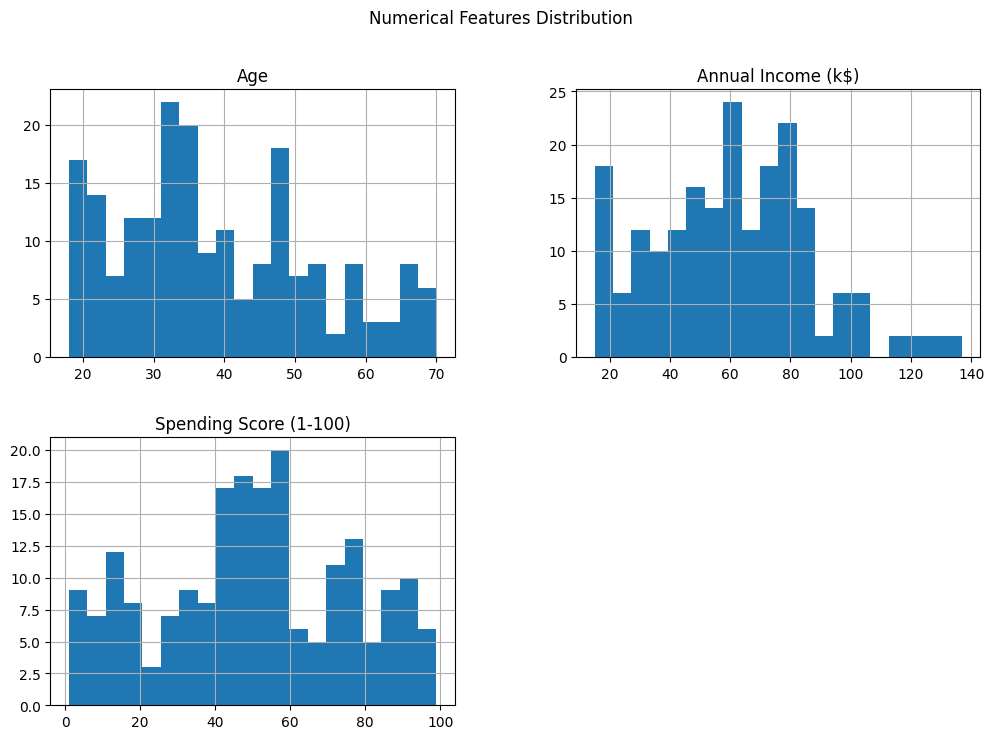

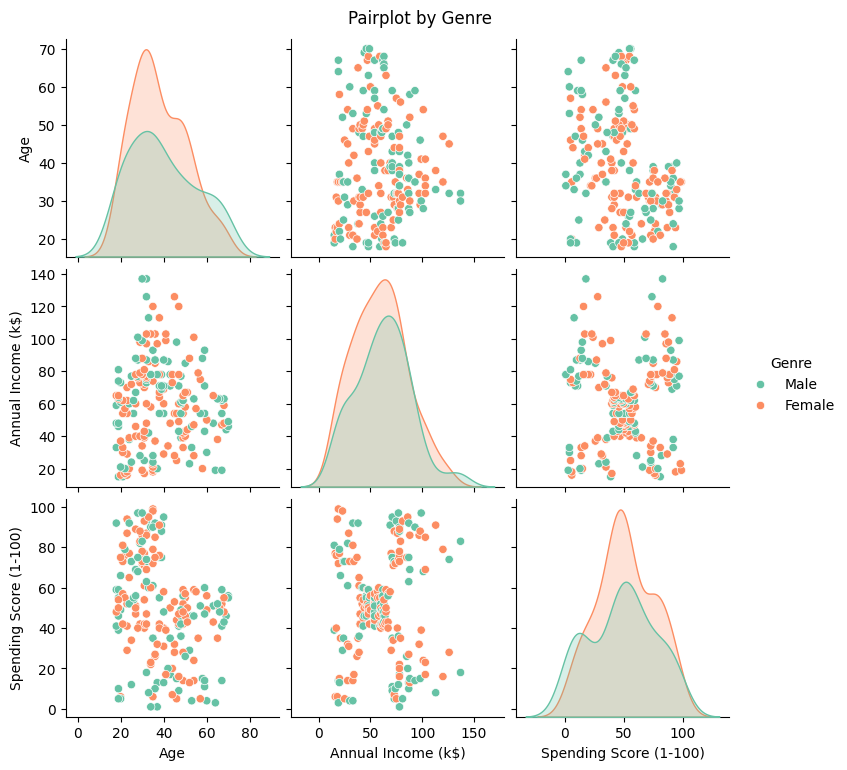

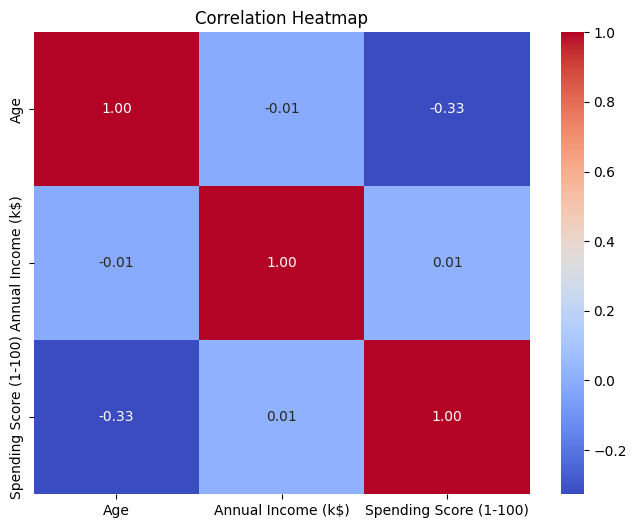

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical summary
print(df.describe())

# Distribution plots for numerical features
num_cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
df[num_cols].hist(bins=20, figsize=(12,8))
plt.suptitle("Numerical Features Distribution")
plt.show()

# Pairplot with hue=Genre
sns.pairplot(df, vars=num_cols, hue='Genre', palette='Set2')
plt.suptitle("Pairplot by Genre", y=1.02)
plt.show()

# Correlation heatmap (only numeric columns)
plt.figure(figsize=(8,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


### 3. Data Preprocessing

In [8]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Encode Genre to numeric
le = LabelEncoder()
df['Genre_enc'] = le.fit_transform(df['Genre'])

# Features for clustering (drop CustomerID and original Genre)
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Genre_enc']
X = df[features]

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


## 4. Clustering Methods
### 4.1 KMeans

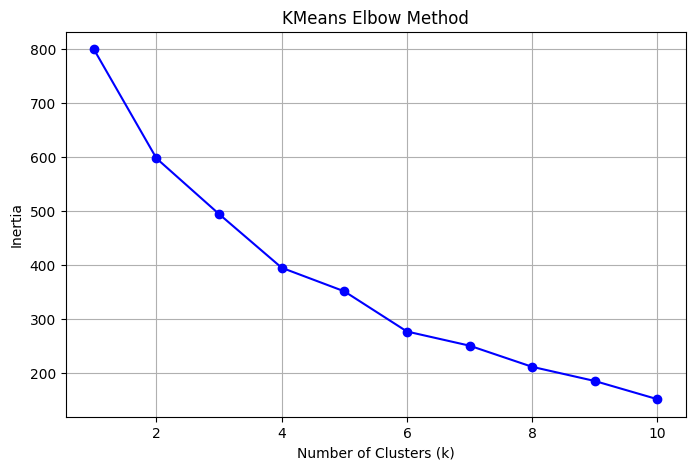

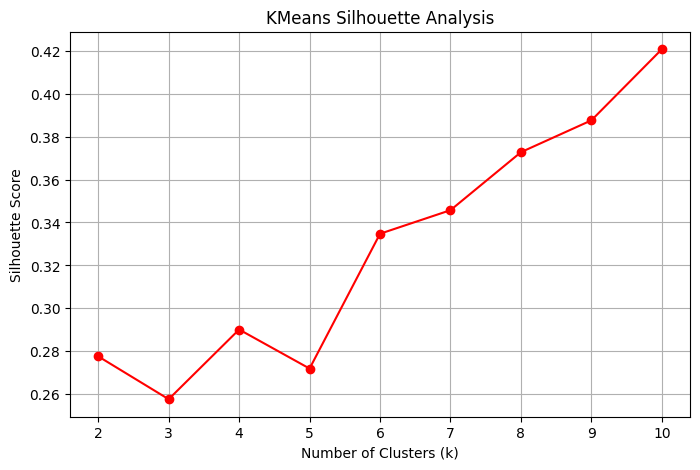

In [9]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

# Determine optimal k with Elbow method
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('KMeans Elbow Method')
plt.grid(True)
plt.show()

# Silhouette analysis for k=2 to 10
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, labels))

plt.figure(figsize=(8,5))
plt.plot(range(2, 11), silhouette_scores, 'ro-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('KMeans Silhouette Analysis')
plt.grid(True)
plt.show()


### 4.2 Hierarchical Clustering (Agglomerative)

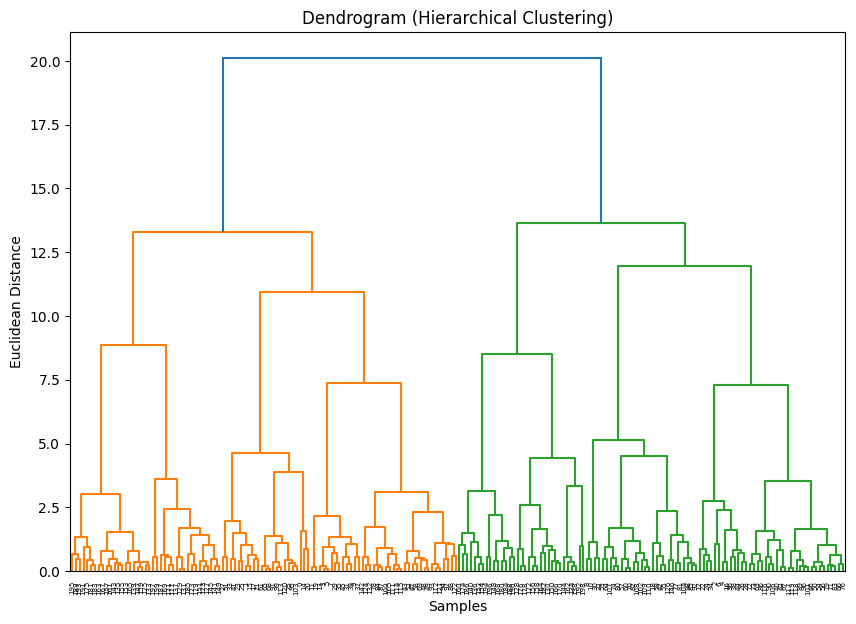

In [10]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

# Dendrogram for visualization
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.title('Dendrogram (Hierarchical Clustering)')
plt.xlabel('Samples')
plt.ylabel('Euclidean Distance')
plt.show()

# Fit Agglomerative Clustering with optimal k (choose based on dendrogram)
optimal_k = 5  # example, adjust after dendrogram

hc = AgglomerativeClustering(n_clusters=optimal_k, metric='euclidean', linkage='ward')
hc_labels = hc.fit_predict(X_scaled)


### 4.3 DBSCAN

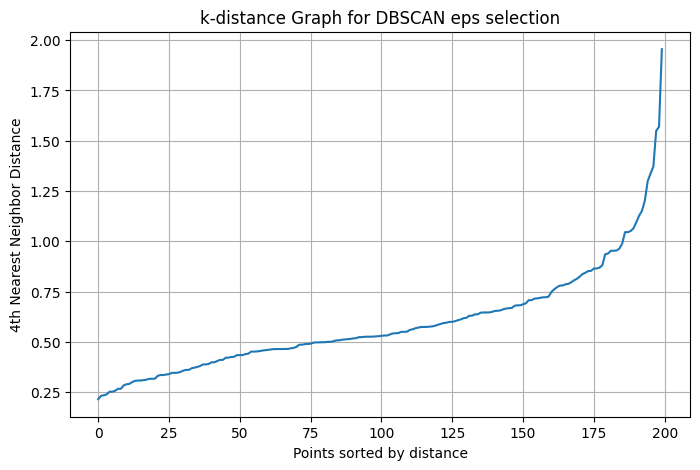

In [11]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

# Determine eps using k-distance graph (k=4)
neighbors = NearestNeighbors(n_neighbors=4)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

distances = np.sort(distances[:,3], axis=0)
plt.figure(figsize=(8,5))
plt.plot(distances)
plt.xlabel('Points sorted by distance')
plt.ylabel('4th Nearest Neighbor Distance')
plt.title('k-distance Graph for DBSCAN eps selection')
plt.grid(True)
plt.show()

# Fit DBSCAN with chosen eps and min_samples=4
dbscan = DBSCAN(eps=0.6, min_samples=4)  # Adjust eps after graph observation
dbscan_labels = dbscan.fit_predict(X_scaled)


### 5. Results & Visualization

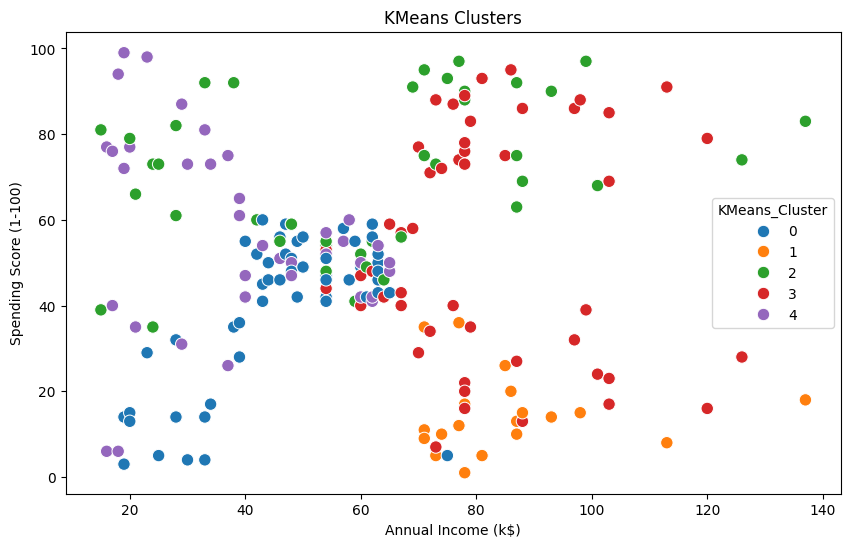

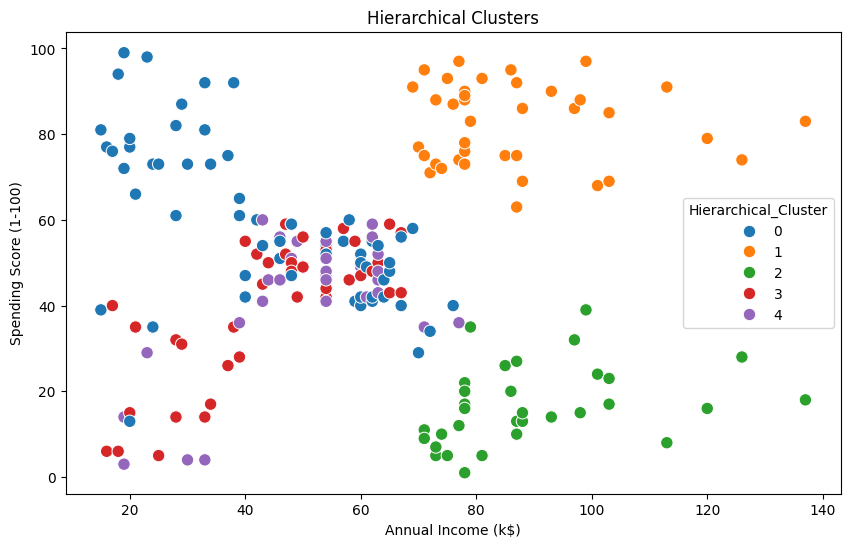

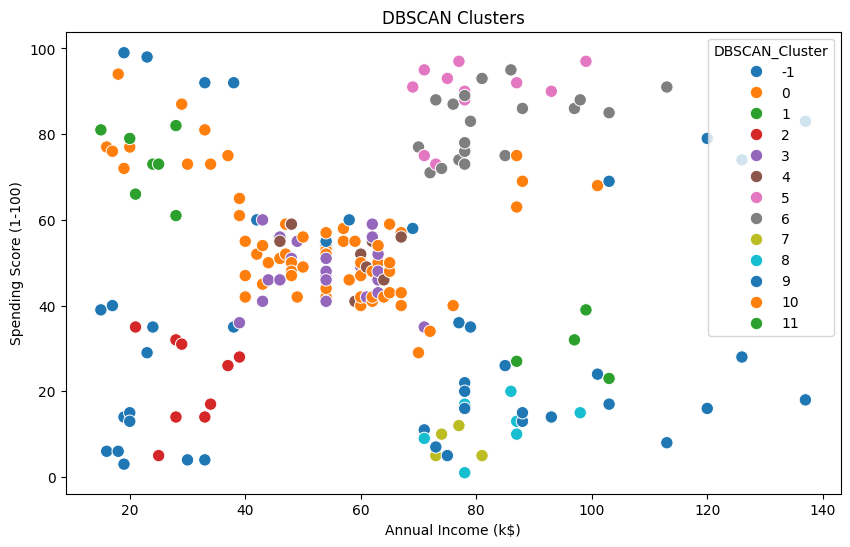

In [12]:
import seaborn as sns

# Add cluster labels to dataframe
df['KMeans_Cluster'] = KMeans(n_clusters=optimal_k, random_state=42).fit_predict(X_scaled)
df['Hierarchical_Cluster'] = hc_labels
df['DBSCAN_Cluster'] = dbscan_labels

# Plot KMeans clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='KMeans_Cluster', data=df, palette='tab10', s=80)
plt.title('KMeans Clusters')
plt.show()

# Plot Hierarchical clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Hierarchical_Cluster', data=df, palette='tab10', s=80)
plt.title('Hierarchical Clusters')
plt.show()

# Plot DBSCAN clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='DBSCAN_Cluster', data=df, palette='tab10', s=80)
plt.title('DBSCAN Clusters')
plt.show()


### 6. Cluster Analysis Summary

In [13]:
# Summary statistics for each clustering method

for method in ['KMeans_Cluster', 'Hierarchical_Cluster', 'DBSCAN_Cluster']:
    print(f"\nSummary stats for {method}:")
    print(df.groupby(method)[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean())
    print(df[method].value_counts())



Summary stats for KMeans_Cluster:
                      Age  Annual Income (k$)  Spending Score (1-100)
KMeans_Cluster                                                       
0               56.470588           46.098039               39.313725
1               39.500000           85.150000               14.050000
2               28.690476           60.904762               70.238095
3               37.897959           82.122449               54.448980
4               27.315789           38.842105               56.210526
KMeans_Cluster
0    51
3    49
2    42
4    38
1    20
Name: count, dtype: int64

Summary stats for Hierarchical_Cluster:
                            Age  Annual Income (k$)  Spending Score (1-100)
Hierarchical_Cluster                                                       
0                     26.147541           43.770492               58.967213
1                     32.692308           86.538462               82.128205
2                     41.454545           89.0909

### 7. Export Results

In [14]:
# output_path = "C:/Users/yadav/Documents/Projects/ML-Algorithms-Tutorial/outputs/mall_customers_segmentation_clusters.csv"
# df.to_csv(output_path, index=False)
# print(f"Clustered data saved to {output_path}")


### Clustering models and evaluation
We'll run both KMeans and Hierarchical clustering on the scaled numerical features, evaluate them with Elbow and Silhouette methods, and assign cluster labels.

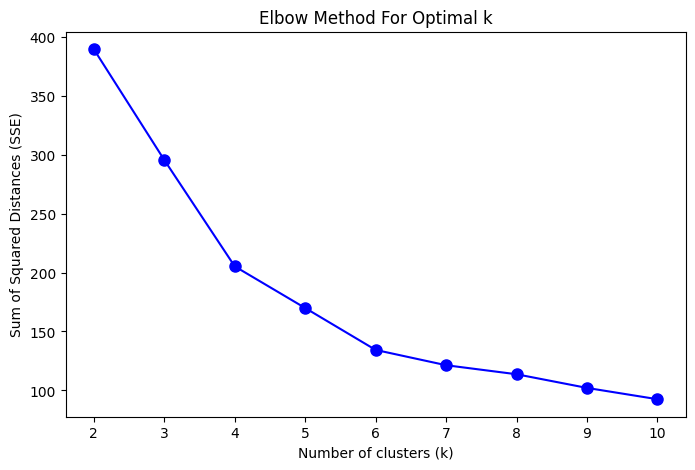

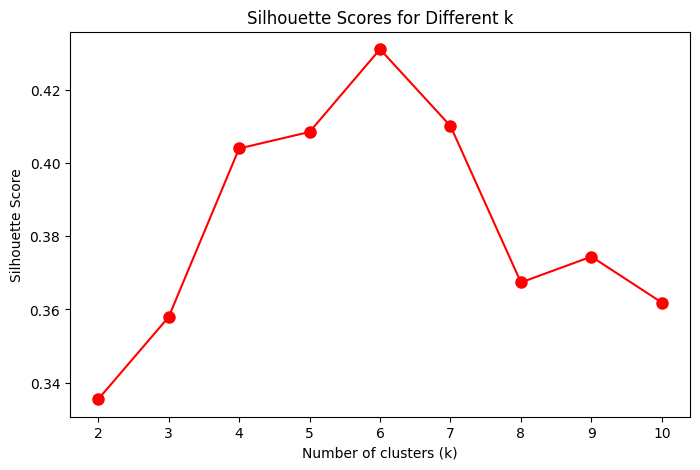

In [15]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Features for clustering
X = df[num_cols].values

# Scaling (already done, but just to confirm)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 1. Elbow method for KMeans
sse = []
k_range = range(2, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(k_range, sse, 'bo-', markersize=8)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Distances (SSE)')
plt.title('Elbow Method For Optimal k')
plt.show()

# 2. Silhouette scores for KMeans
sil_scores = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    sil = silhouette_score(X_scaled, labels)
    sil_scores.append(sil)

plt.figure(figsize=(8,5))
plt.plot(k_range, sil_scores, 'ro-', markersize=8)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different k')
plt.show()

# Choose optimal k based on above plots
optimal_k = 5

# Fit KMeans with optimal k
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42)
df['KMeans_Cluster'] = kmeans_final.fit_predict(X_scaled)

# Hierarchical Clustering with metric parameter instead of affinity
hc = AgglomerativeClustering(n_clusters=optimal_k, metric='euclidean', linkage='ward')
df['Hierarchical_Cluster'] = hc.fit_predict(X_scaled)


### Step 2: Save cluster labels and summaries

In [16]:
# Save cluster labels to CSV
# df.to_csv('Mall_Customers_Clustered.csv', index=False)

# Summary statistics per cluster - KMeans
kmeans_summary = df.groupby('KMeans_Cluster')[num_cols].mean()
print("KMeans Cluster Summary:")
print(kmeans_summary)

# Summary statistics per cluster - Hierarchical
hier_summary = df.groupby('Hierarchical_Cluster')[num_cols].mean()
print("\nHierarchical Cluster Summary:")
print(hier_summary)


KMeans Cluster Summary:
                      Age  Annual Income (k$)  Spending Score (1-100)
KMeans_Cluster                                                       
0               55.275862           47.620690               41.706897
1               32.875000           86.100000               81.525000
2               25.769231           26.115385               74.846154
3               26.733333           54.311111               40.911111
4               44.387097           89.774194               18.483871

Hierarchical Cluster Summary:
                            Age  Annual Income (k$)  Spending Score (1-100)
Hierarchical_Cluster                                                       
0                     26.560606           47.363636               56.787879
1                     56.400000           55.288889               48.355556
2                     32.692308           86.538462               82.128205
3                     43.892857           91.285714               16.678571

### Step 3: Visualizations and interpretation

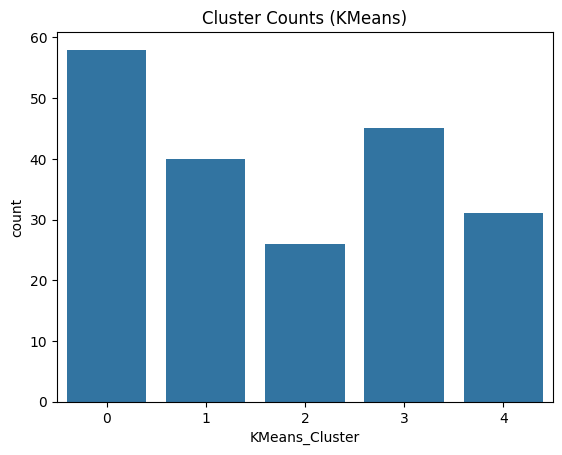

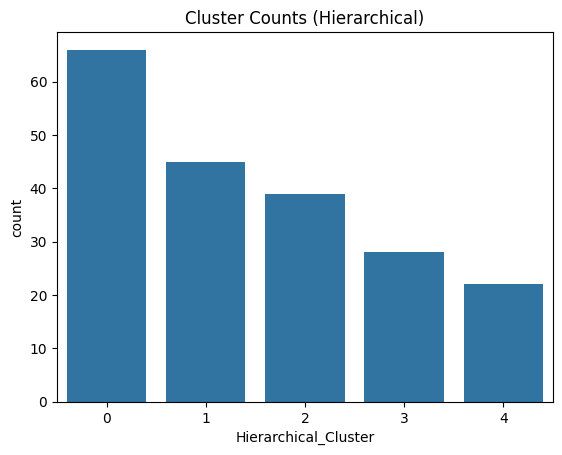

In [17]:
import plotly.express as px

# 2D scatter plot with clusters from KMeans
fig = px.scatter(df, x='Annual Income (k$)', y='Spending Score (1-100)', color='KMeans_Cluster',
                 title='KMeans Clusters: Annual Income vs Spending Score',
                 labels={'color':'Cluster'})
fig.show()

# 2D scatter plot with clusters from Hierarchical
fig = px.scatter(df, x='Annual Income (k$)', y='Spending Score (1-100)', color='Hierarchical_Cluster',
                 title='Hierarchical Clusters: Annual Income vs Spending Score',
                 labels={'color':'Cluster'})
fig.show()

# Cluster count plot for KMeans
sns.countplot(x='KMeans_Cluster', data=df)
plt.title("Cluster Counts (KMeans)")
plt.show()

# Cluster count plot for Hierarchical
sns.countplot(x='Hierarchical_Cluster', data=df)
plt.title("Cluster Counts (Hierarchical)")
plt.show()


### Dashboard

### Interactive Dashboard

In [50]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display, clear_output

# Load dataset
df = pd.read_csv(r"C:\Users\yadav\Documents\Projects\ML-Algorithms-Tutorial\datasets\clustering\Mall_Customers.csv")

# Features to cluster on (numeric only)
cluster_features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

# Scale only numeric features
X_scaled = StandardScaler().fit_transform(df[cluster_features])

# Widgets
methods = ['KMeans', 'Agglomerative', 'DBSCAN']
method_dropdown = widgets.Dropdown(options=methods, value='KMeans', description='Method:')
cluster_slider = widgets.IntSlider(value=4, min=2, max=10, description='Clusters:')
eps_slider = widgets.FloatSlider(value=0.5, min=0.1, max=3.0, step=0.1, description='DBSCAN eps:', continuous_update=False)

# Limit plot axes choices to numeric columns only
x_dropdown = widgets.Dropdown(options=cluster_features, value='Age', description='X-axis:')
y_dropdown = widgets.Dropdown(options=cluster_features, value='Annual Income (k$)', description='Y-axis:')
z_dropdown = widgets.Dropdown(options=cluster_features, value='Spending Score (1-100)', description='Z-axis:')

silhouette_out = widgets.HTML(value="", placeholder="Silhouette Score", description="")
output_plot = widgets.Output()

def run_clustering(method, n_clusters, eps, x_col, y_col, z_col):
    with output_plot:
        clear_output(wait=True)
        if method == "KMeans":
            model = KMeans(n_clusters=n_clusters, random_state=42)
            labels = model.fit_predict(X_scaled)
        elif method == "Agglomerative":
            model = AgglomerativeClustering(n_clusters=n_clusters)
            labels = model.fit_predict(X_scaled)
        elif method == "DBSCAN":
            model = DBSCAN(eps=eps, min_samples=4)
            labels = model.fit_predict(X_scaled)
        else:
            raise ValueError("Unsupported method")

        df['Cluster'] = labels

        # Silhouette score (only for valid cluster counts)
        if method != 'DBSCAN' and len(set(labels)) > 1 and -1 not in set(labels):
            score = silhouette_score(X_scaled, labels)
            silhouette_out.value = f"<b>Silhouette Score:</b> {score:.3f}"
        else:
            silhouette_out.value = "<b>Silhouette Score:</b> N/A for DBSCAN or single cluster"

        # Plot clusters
        fig = px.scatter_3d(
            df,
            x=x_col,
            y=y_col,
            z=z_col,
            color=df['Cluster'].astype(str),
            title=f"{method} Clustering - {n_clusters if method != 'DBSCAN' else 'DBSCAN'} clusters"
        )
        fig.update_layout(margin=dict(l=0, r=0, b=0, t=40))
        fig.show()

def on_change(change=None):
    method = method_dropdown.value
    n_clusters = cluster_slider.value
    eps = eps_slider.value
    x_col = x_dropdown.value
    y_col = y_dropdown.value
    z_col = z_dropdown.value

    # Show/hide cluster slider or eps slider
    if method == "DBSCAN":
        cluster_slider.layout.display = 'none'
        eps_slider.layout.display = 'block'
    else:
        cluster_slider.layout.display = 'block'
        eps_slider.layout.display = 'none'

    run_clustering(method, n_clusters, eps, x_col, y_col, z_col)

# Link observers
method_dropdown.observe(on_change, names='value')
cluster_slider.observe(on_change, names='value')
eps_slider.observe(on_change, names='value')
x_dropdown.observe(on_change, names='value')
y_dropdown.observe(on_change, names='value')
z_dropdown.observe(on_change, names='value')

# Layout and display
controls = widgets.VBox([
    method_dropdown,
    cluster_slider,
    eps_slider,
    widgets.HBox([x_dropdown, y_dropdown, z_dropdown]),
    silhouette_out
])
eps_slider.layout.display = 'none'  # hide initially

display(controls, output_plot)

on_change()


Output()